# Assessment

Engenharia de Prompts para Ciência de Dados

Pedro Monteiro Vieira Bayma Azevedo

## Imports

In [41]:
import os
from dotenv import load_dotenv
import google.generativeai as genai
import matplotlib.pyplot as plt
import json
from functions import *
import numpy as np

import faiss
import torch
from sentence_transformers import SentenceTransformer
from transformers import pipeline




import requests
import pandas as pd

In [3]:
#loading api key
load_dotenv('.env')

True

## Exercício 1 - FAZER

### Fazer por Último

## Exercício 2

![Claude](./images/2-Claude.png)

![Gemini](./images/2-Gemini.png)



![GPT](./images/2-GPT.png)

### Respostas

#### a

O Claude tem como principais vantagens suas características mais voltadas para tarefas complexas e analíticas, bem como tarefas que envolvam código e escrita. Como desvantagem podemos apontar o tamanho da janela de contexto que é menor que o de outros LLMs e atualmente estar em versão de testes.


O Gemini Pro tem como principal vantagem sua capacidade multimodal que lida bem com textos, imagens, etc, e o custo menor quando comparado por exemplo ao GPT 4o. Com desvantagem podemos apontar sua menos consistência nas respostas e na capaxidade de compreender com precisão comandos quando comparado com outros modelos.

Por fim, o GPT 4o tem como vantagens o tamanho de sua janela de contexto, bem como sua performance de forma geral, podendo atuar em vários contextos. Como desvantagem, temos o custo elevado quando comparado a outros modelos e a necessidade de assinatura.


#### b 

Todas as respostas foram corretas. A resposta do Claude e do GPT foram extremamente próximas, tanto em conteúdo quanto em tamanho e temas abordados. Por sua vez a resposta do Gemini foi mais abrangente incluindo outras informações e foi um pouco maior que as outras duas.

#### c

Eu elejo a respsota do Claude como a mais próxima do esperado por ter atendido melhor aos requisitos de ser curta e trazer conteúdo que descrevia bem, de forma mais geral, o papel da Câmara dos Deputados.

#### d

![GPT](./images/2-Yaml.png)




 

## Exercício 3

### a - código dentro do arquivo dataprep.py

### b

In [17]:
pizzaPrompt = """

### Contexto

Você é um especialista em ciência de dados.
Eu possuo um arquivo parquet com os dados dos deputados do brasil. Nesses dados temos informação na coluna
siglaPartido, do partido de cada deputado. 

### Instrução
Favor gerar código em python que crie um gráfico de pizza com o total e o percentual de cada deputado por partido.
Utilize as bibliotecas pandas, e matplotlib.

No fim, o código deve salvar o gráfico em um arquivo png com o nome de "distribuicao_deputados.png" no diretório
existente docs utilizando o seguinte path: "docs/distribuicao_deputados.png"

Favor retornar somente o código em python sem nehum comentário adicional

"""

genai.configure(api_key=os.environ["GEMINI_KEY"])
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(pizzaPrompt)
print(response.text)

```python
import pandas as pd
import matplotlib.pyplot as plt

# Certifique-se de que o arquivo parquet esteja no mesmo diretório ou especifique o caminho completo
df = pd.read_parquet("deputados.parquet")

# Contagem de deputados por partido
partidos = df['siglaPartido'].value_counts()

# Criando o gráfico de pizza
plt.figure(figsize=(10, 10))
plt.pie(partidos, labels=partidos.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Deputados por Partido')
plt.axis('equal')  # Para garantir que o gráfico seja um círculo

# Salvando o gráfico
plt.savefig("docs/distribuicao_deputados.png")

plt.show()

```



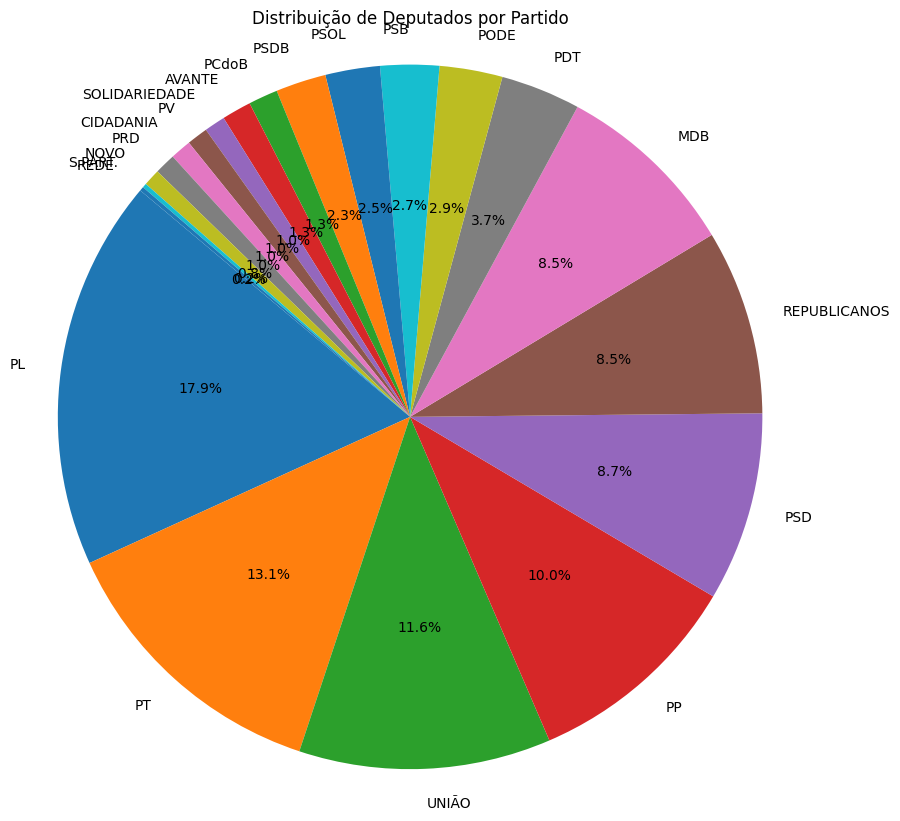

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Certifique-se de que o arquivo parquet esteja no mesmo diretório ou especifique o caminho completo
df = pd.read_parquet("./data/deputados.parquet")

# Contagem de deputados por partido
partidos = df['siglaPartido'].value_counts()

# Criando o gráfico de pizza
plt.figure(figsize=(10, 10))
plt.pie(partidos, labels=partidos.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Deputados por Partido')
plt.axis('equal')  # Para garantir que o gráfico seja um círculo

# Salvando o gráfico
plt.savefig("docs/distribuicao_deputados.png")

plt.show()


### c

In [45]:
df = pd.read_parquet("./data/deputados.parquet")
partidos = df['siglaPartido'].value_counts()
partidos_texto = str(partidos.to_dict())




insightPartidosPrompt = f"""

### Contexto

Você é um especialista em ciência de dados.
Eu possuo um arquivo texto com a distribuição dos deputados por partido.

### Instrução
Favor gerar insights a partir do dado {partidos_texto} sobre a distruibuição dos deputados por 
partido e como isso pode impactar o dia a dia da câmara dos deputados.

Favor retornar a análise em um formato json com a seguinte estrutura:
    
    ```json
    
        "insight1": "Insight 1",
        "insight2": "Insight 2",
        "insight3": "Insight 3"
    
    ```

"""

genai.configure(api_key=os.environ["GEMINI_KEY"])
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(insightPartidosPrompt)
print(response.text)

```json
{
  "insight1": "O PL detém uma posição de força significativa na Câmara dos Deputados, com 93 deputados, representando quase um terço do total.  Isso concede ao partido um poder considerável na aprovação de projetos de lei e na formação de alianças, potencialmente levando a uma agenda legislativa mais alinhada com suas prioridades e influenciando fortemente o rumo das votações.",
  "insight2": "A fragmentação partidária é evidente, com diversos partidos possuindo representações menores.  A presença de diversos partidos com poucos deputados (como NOVO, REDE, S.PART.) dificulta a formação de coalizões estáveis e pode resultar em maior instabilidade política e negociações mais complexas para a aprovação de propostas, demandando maior capacidade de articulação política dos líderes partidários.",
  "insight3": "O PT, apesar de ter uma expressiva bancada com 68 deputados, está em posição de oposição ao PL. A dinâmica entre esses dois partidos de grande porte moldará significativamen

In [ ]:
clean_response= response.text.replace("```json\n",'').replace("\n```",'')
insights = json.loads(clean_response)


with open("./data/insights_distribuicao_deputados.json", "w") as file:
    json.dump(insights, file, indent=4, ensure_ascii=False)


### Resposta

O prompt define a instrução a ser passada ao LLM e será formada por alguns componentes. A persona, um desses componentes é responsável por prover o papel e contextualizar o LLM com relação a como se portar e qual deve ser o foco de suas respostas junto ao usuário. Os dados servem como a base de informação que o LLM recebe para poder trabalhar e prover a resposta e por fim, os exemplos servem para demonstrar e contextualizar o LLM da maneira que a resposta deve ser dada, de forma a permitir que sejam respeitados padrões e formatos.

## Exercício 4

### a - código dentro do arquivo dataprep.py

### b

In [74]:
df_despesas = pd.read_parquet("./data/serie_despesas_diárias_deputados.parquet").sample(5)
despesas_texto = str(df_despesas.to_dict())
despesas_texto

"{'id': {1617: 141411, 4613: 220662, 4025: 141464, 5738: 178896, 857: 220605}, 'nome': {1617: 'Dagoberto Nogueira', 4613: 'Lucas Ramos', 4025: 'José Airton Félix Cirilo', 5738: 'Newton Cardoso Jr', 857: 'Bandeira de Mello'}, 'tipo_despesa': {1617: 'MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR', 4613: 'MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR', 4025: 'MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR', 5738: 'COMBUSTÍVEIS E LUBRIFICANTES.', 857: 'MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR'}, 'valor_documento': {1617: 900.0, 4613: 1100.0, 4025: 5558.24, 5738: 200.03, 857: 517.0}, 'data_documento': {1617: '2024-07-03T00:00:00', 4613: '2024-10-04T00:00:00', 4025: '2024-08-27T00:00:00', 5738: '2024-07-31T00:00:00', 857: '2024-07-17T00:00:00'}}"

In [76]:
df_despesas = pd.read_parquet("./data/serie_despesas_diárias_deputados.parquet").sample(5)
despesas_texto = str(df_despesas.to_dict())

prompt1 = f"""

### Contexto

Você é um especialista em ciência de dados.
Eu possuo um arquivo parquet com as depesas dos deputados que contém somente as seguintes colunas:
id, nome, tipo_despesa, valor_documento, data_documento conforme amostra abaixo:

{despesas_texto}

### Instrução
Favor sugerir 3 análises simples que possam ser feitas somente com os dados das despesas dos deputados.

"""

genai.configure(api_key=os.environ["GEMINI_KEY"])
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(prompt1)
print(response.text)

Com os dados fornecidos, podemos realizar algumas análises simples e descritivas.  Eis três sugestões:

**1. Despesa total por deputado:**

Esta análise visa determinar o total gasto por cada deputado.  Isso fornece uma visão geral imediata de quem teve as maiores despesas.

* **Método:** Agrupar os dados por `nome` e somar o `valor_documento` para cada deputado.
* **Resultado:** Uma tabela ou gráfico mostrando o nome de cada deputado e o total gasto por ele.  Essa análise pode ser complementada com a visualização de um gráfico de barras, ordenando os deputados pelo valor total gasto, para melhor percepção visual.
* **Interpretação:** Identifica os deputados com os maiores gastos, permitindo investigações posteriores sobre a natureza dessas despesas.

**2. Despesa média por tipo de despesa:**

Esta análise calcula a despesa média para cada `tipo_despesa`.  Isso ajuda a identificar quais tipos de despesas são mais caras em média.

* **Método:** Agrupar os dados por `tipo_despesa` e calc

In [83]:
prompt2 = f"""

### Contexto

Você é um especialista em ciência de dados.
Eu possuo um arquivo parquet com as depesas dos deputados que contém somente as seguintes colunas:
id, nome, tipo_despesa, valor_documento, data_documento conforme amostra abaixo:

{despesas_texto}

### Instrução
Favor gerar o código python para a seguinte análise:

**1. Despesa total por deputado:**

Esta análise visa determinar o total gasto por cada deputado.  Isso fornece uma visão geral imediata de quem teve as maiores despesas.

* **Método:** Agrupar os dados por `nome` e somar o `valor_documento` para cada deputado.
* **Resultado:** Uma tabela ou gráfico mostrando o nome de cada deputado e o total gasto por ele.  Essa análise pode ser complementada com a visualização de um gráfico de barras, ordenando os deputados pelo valor total gasto, para melhor percepção visual.
* **Interpretação:** Identifica os deputados com os maiores gastos, permitindo investigações posteriores sobre a natureza dessas despesas.

### Requisitos:

O código python deve considerar que o arquivo parquet possui o seguinte path ./data/serie_despesas_diárias_deputados.parquet

O código deve salvar a tabela final em um arquivo csv com o nome "despesa_total_por_deputado.csv" no seguinte path existente 
em ./data/despesa_total_por_deputado.csv

O código deve mostrar o gráfico de barras com a análise.

A saída deve ser somente o código em python sem comentários adicionais.

"""


genai.configure(api_key=os.environ["GEMINI_KEY"])
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(prompt2)
print(response.text)

```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carrega o arquivo parquet
df = pd.read_parquet('./data/serie_despesas_diárias_deputados.parquet')

# Calcula a despesa total por deputado
despesa_total = df.groupby('nome')['valor_documento'].sum().reset_index()

# Salva a tabela em um arquivo CSV
despesa_total.to_csv('./data/despesa_total_por_deputado.csv', index=False)

# Cria o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='nome', y='valor_documento', data=despesa_total, order=despesa_total.sort_values('valor_documento', ascending=False).nome)
plt.xticks(rotation=90)
plt.xlabel('Deputado')
plt.ylabel('Total Gasto')
plt.title('Despesa Total por Deputado')
plt.tight_layout()
plt.show()

```



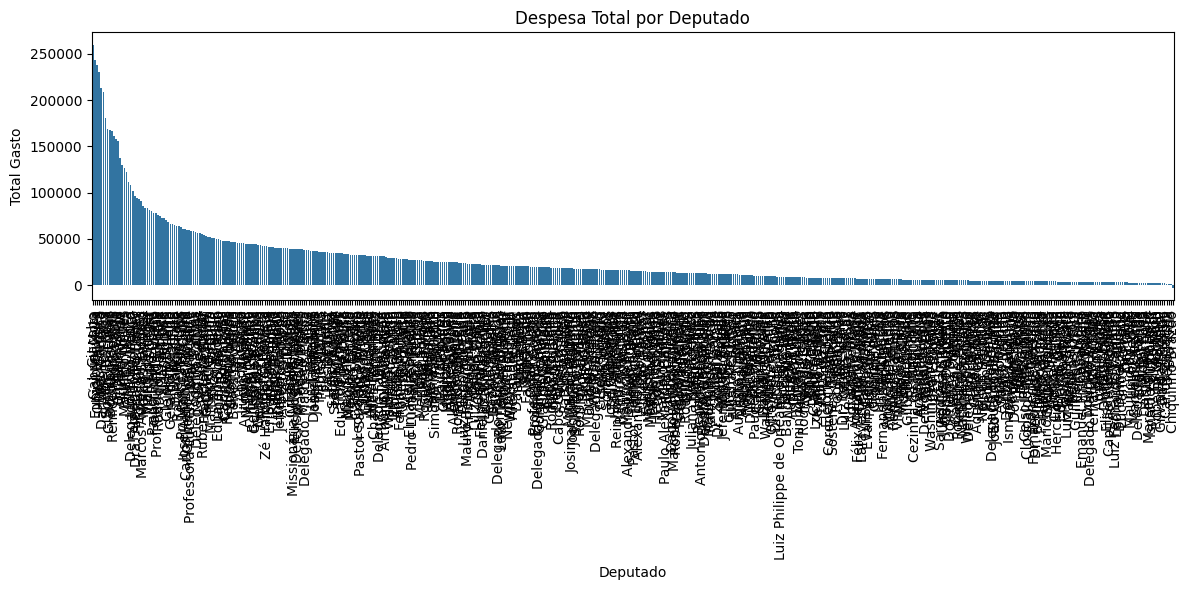

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carrega o arquivo parquet
df = pd.read_parquet('./data/serie_despesas_diárias_deputados.parquet')

# Calcula a despesa total por deputado
despesa_total = df.groupby('nome')['valor_documento'].sum().reset_index()

# Salva a tabela em um arquivo CSV
despesa_total.to_csv('./data/despesa_total_por_deputado.csv', index=False)

# Cria o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='nome', y='valor_documento', data=despesa_total, order=despesa_total.sort_values('valor_documento', ascending=False).nome)
plt.xticks(rotation=90)
plt.xlabel('Deputado')
plt.ylabel('Total Gasto')
plt.title('Despesa Total por Deputado')
plt.tight_layout()
plt.show()

In [86]:
prompt3 = f"""

### Contexto

Você é um especialista em ciência de dados.
Eu possuo um arquivo parquet com as depesas dos deputados que contém somente as seguintes colunas:
id, nome, tipo_despesa, valor_documento, data_documento conforme amostra abaixo:

{despesas_texto}

### Instrução
Favor gerar o código python para a seguinte análise:

**2. Despesa média por tipo de despesa:**

Esta análise calcula a despesa média para cada `tipo_despesa`.  Isso ajuda a identificar quais tipos de despesas são mais caras em média.

* **Método:** Agrupar os dados por `tipo_despesa` e calcular a média do `valor_documento` para cada grupo.
* **Resultado:** Uma tabela mostrando cada tipo de despesa e sua média de custo.  Um gráfico de barras seria também uma ótima visualização.
* **Interpretação:**  Permite identificar os tipos de despesas que consomem mais recursos em média, indicando possíveis áreas de otimização ou necessidade de maior transparência.

### Requisitos:

O código python deve considerar que o arquivo parquet possui o seguinte path ./data/serie_despesas_diárias_deputados.parquet

O código deve salvar a tabela final em um arquivo csv com o nome "despesa média por tipo de despesa.csv" no seguinte path existente 
em ./data/despesa_média_por_tipo_de_despesa.csv

O código deve mostrar o gráfico de barras com a análise.

A saída deve ser somente o código em python sem comentários adicionais.

"""


genai.configure(api_key=os.environ["GEMINI_KEY"])
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(prompt3)
print(response.text)

```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carrega o arquivo parquet
df = pd.read_parquet('./data/serie_despesas_diárias_deputados.parquet')

# Calcula a despesa média por tipo de despesa
despesa_media_por_tipo = df.groupby('tipo_despesa')['valor_documento'].mean().reset_index()

# Salva a tabela em um arquivo CSV
despesa_media_por_tipo.to_csv('./data/despesa_média_por_tipo_de_despesa.csv', index=False)

# Cria o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='tipo_despesa', y='valor_documento', data=despesa_media_por_tipo)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Tipo de Despesa')
plt.ylabel('Despesa Média')
plt.title('Despesa Média por Tipo de Despesa')
plt.tight_layout()
plt.show()

```



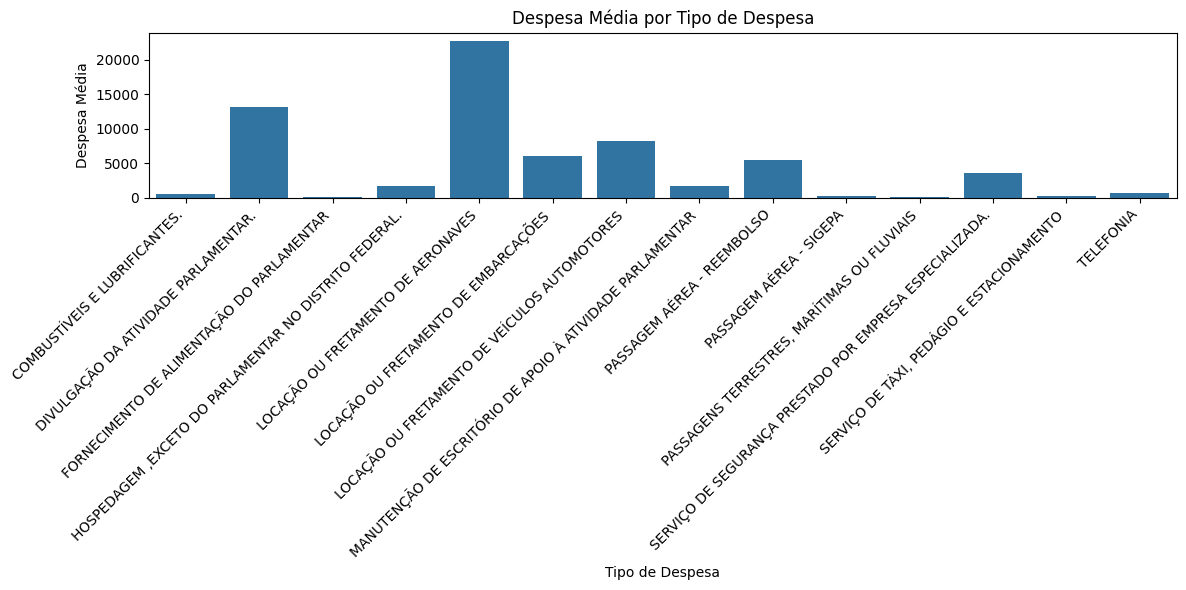

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carrega o arquivo parquet
df = pd.read_parquet('./data/serie_despesas_diárias_deputados.parquet')

# Calcula a despesa média por tipo de despesa
despesa_media_por_tipo = df.groupby('tipo_despesa')['valor_documento'].mean().reset_index()

# Salva a tabela em um arquivo CSV
despesa_media_por_tipo.to_csv('./data/despesa_média_por_tipo_de_despesa.csv', index=False)

# Cria o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='tipo_despesa', y='valor_documento', data=despesa_media_por_tipo)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Tipo de Despesa')
plt.ylabel('Despesa Média')
plt.title('Despesa Média por Tipo de Despesa')
plt.tight_layout()
plt.show()


In [88]:
prompt4 = f"""

### Contexto

Você é um especialista em ciência de dados.
Eu possuo um arquivo parquet com as depesas dos deputados que contém somente as seguintes colunas:
id, nome, tipo_despesa, valor_documento, data_documento conforme amostra abaixo:

{despesas_texto}

### Instrução
Favor gerar o código python para a seguinte análise:

**3. Distribuição das despesas ao longo do tempo:**

Esta análise explora a variação das despesas ao longo do tempo.

* **Método:**  Converter a coluna `data_documento` para um formato de data apropriado (se necessário) 
e então agregar as despesas por períodos (ex: mês, trimestre).  Podemos calcular a soma das despesas para cada período.
* **Resultado:** Uma tabela ou gráfico de linha mostrando a evolução das despesas totais ao longo do tempo. 
A granularidade (dia, mês, trimestre) deve ser escolhida de acordo com a quantidade de dados disponíveis.
### Requisitos:

O código python deve considerar que o arquivo parquet possui o seguinte path ./data/serie_despesas_diárias_deputados.parquet

O código deve salvar a tabela final em um arquivo csv com o nome "despesas_ao_longo_do_tempo.csv" no seguinte path existente 
em ./data/despesas_ao_longo_do_tempo.csv.csv

O código deve mostrar o gráfico com a análise.

A saída deve ser somente o código em python sem comentários adicionais.

"""


genai.configure(api_key=os.environ["GEMINI_KEY"])
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(prompt4)
print(response.text)

```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carrega o arquivo parquet
df = pd.read_parquet('./data/serie_despesas_diárias_deputados.parquet')

# Converte a coluna 'data_documento' para datetime
df['data_documento'] = pd.to_datetime(df['data_documento'])

# Agrupa as despesas por mês e soma os valores
df['mes'] = df['data_documento'].dt.to_period('M')
despesas_mensais = df.groupby('mes')['valor_documento'].sum().reset_index()

# Converte o periodo para datetime para melhor visualização no gráfico
despesas_mensais['mes'] = despesas_mensais['mes'].dt.to_timestamp()

# Salva a tabela em um arquivo CSV
despesas_mensais.to_csv('./data/despesas_ao_longo_do_tempo.csv', index=False)

# Cria o gráfico de linha
plt.figure(figsize=(12, 6))
sns.lineplot(x='mes', y='valor_documento', data=despesas_mensais)
plt.xlabel('Mês')
plt.ylabel('Total de Despesas')
plt.title('Distribuição das Despesas ao Longo do Tempo')
plt.xticks(rotation=45)
plt.tight_layout()
plt

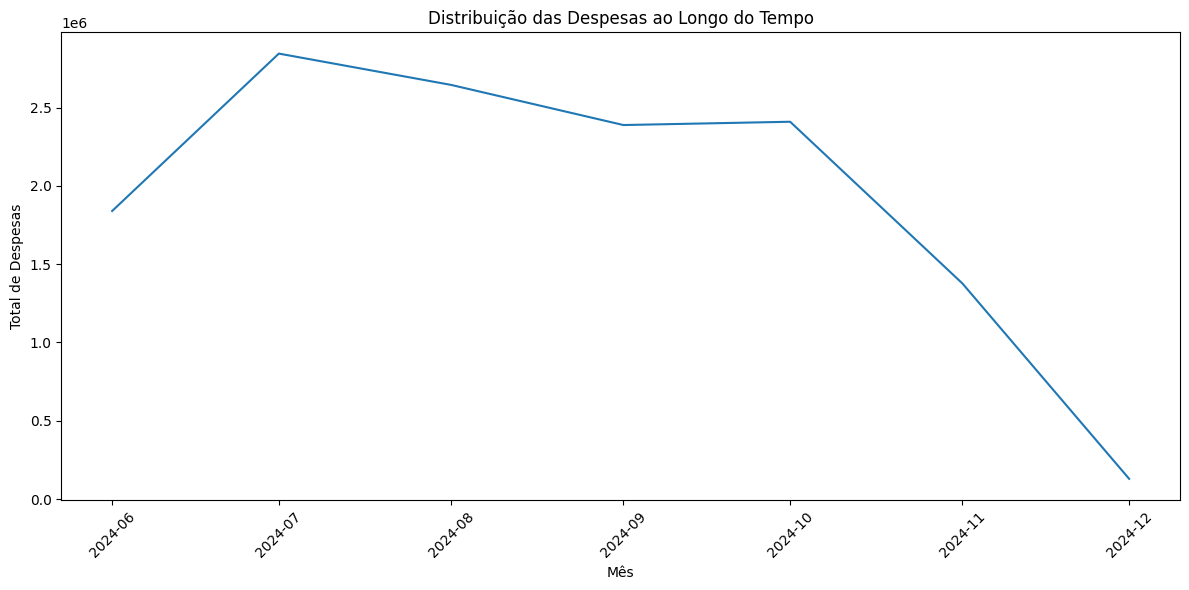

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carrega o arquivo parquet
df = pd.read_parquet('./data/serie_despesas_diárias_deputados.parquet')

# Converte a coluna 'data_documento' para datetime
df['data_documento'] = pd.to_datetime(df['data_documento'])

# Agrupa as despesas por mês e soma os valores
df['mes'] = df['data_documento'].dt.to_period('M')
despesas_mensais = df.groupby('mes')['valor_documento'].sum().reset_index()

# Converte o periodo para datetime para melhor visualização no gráfico
despesas_mensais['mes'] = despesas_mensais['mes'].dt.to_timestamp()

# Salva a tabela em um arquivo CSV
despesas_mensais.to_csv('./data/despesas_ao_longo_do_tempo.csv', index=False)

# Cria o gráfico de linha
plt.figure(figsize=(12, 6))
sns.lineplot(x='mes', y='valor_documento', data=despesas_mensais)
plt.xlabel('Mês')
plt.ylabel('Total de Despesas')
plt.title('Distribuição das Despesas ao Longo do Tempo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### c

In [90]:
df_despesas_medias = pd.read_csv("./data/despesa_média_por_tipo_de_despesa.csv")
despesas_medias  = str(df_despesas_medias .to_dict())

df_despesas_totais = pd.read_csv("./data/despesa_total_por_deputado.csv")
despesas_totais  = str(df_despesas_totais .to_dict())

df_despesas_tempo = pd.read_csv("./data/despesas_ao_longo_do_tempo.csv")
despesas_tempo  = str(df_despesas_tempo .to_dict())


In [94]:
generatedKnowledgePrompt = f"""

### Contexto

Você é um especialista em ciência de dados.

Em sua resposta considere as análises prévias realizadas com os dados de despesas dos deputados:

1. Despesas médias por tipo de despesa:

{despesas_medias}

2. Despesa total por deputado:

{despesas_totais}

3. Distribuição das despesas ao longo do tempo:

{despesas_tempo}

Eu possuo um arquivo parquet com as depesas dos deputados que contém somente as seguintes colunas:
id, nome, tipo_despesa, valor_documento, data_documento conforme amostra abaixo:

{despesas_texto}

### Instrução
Favor gerar insights a partir dos dados fornecidos e análises previamente realizadas.

Favor retornar a análise em um formato json com a seguinte estrutura:
    
    ```json
    
        "insight1": "Insight 1",
        "insight2": "Insight 2",
        "insight3": "Insight 3"
    
    ```

"""

genai.configure(api_key=os.environ["GEMINI_KEY"])
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(generatedKnowledgePrompt)
print(response.text)

```json
{
  "insight1": "As despesas com 'DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR' apresentam a maior média (R$ 13.072,26), indicando uma alta concentração de recursos nessa área.  É necessário investigar se esse valor está alinhado com as práticas de transparência e se há uma distribuição equitativa entre os deputados.",
  "insight2": "Há uma grande disparidade nas despesas totais por deputado, variando de valores muito baixos a valores extremamente altos (como o deputado Alberto Fraga com R$ 180.949,25). Essa discrepância exige uma análise mais aprofundada para entender as causas, considerando fatores como tamanho da equipe, região representada e tipo de atividade parlamentar desempenhada. A análise de outliers pode ser crucial para identificar possíveis anomalias.",
  "insight3": "As despesas demonstram uma sazonalidade, com picos nos meses de julho e agosto de 2024, e uma queda significativa em novembro e dezembro. Isso sugere a possibilidade de fatores externos influenciando as despes

In [95]:
clean_response= response.text.replace("```json\n",'').replace("\n```",'')
insights = json.loads(clean_response)


with open("./data/insights_despesas_deputados.json", "w") as file:
    json.dump(insights, file, indent=4, ensure_ascii=False)

## Exercício 5

### a - código dentro do arquivo dataprep.py

### b

In [2]:
df_proposicoes = pd.read_parquet("./data/proposicoes_deputados.parquet")

proposicoes = str(df_proposicoes[['ementa','tema','id']].to_dict())


In [3]:
summary_prompt = f"""

### Contexto
Você é um assessor parlamentar que deve preparar um resumo das proposições dos deputados.

### Instrução

Resuma as proposições dos deputados constantes no seguintes dados:

{proposicoes}


Você deve retornar a resposta em um formato JSON com a seguinte estrutura:
    
    ```json
    
        "id1": "Resumo 1",
        "id2": "Resumo 2",
        "id3": "Resumo 3"
    
    ```

"""


proposition_summarizer = ChunkSummary(
    model_name = "gemini-1.5-flash",
    apikey = os.environ["GEMINI_KEY"],
    text = summary_prompt,
    window_size = 100,
    overlap_size = 25
)

proposition_summary = proposition_summarizer.summarize()

Summarizing text
Summarizing chunk 1 from 1
Final summarization


In [5]:
clean_summary= proposition_summary.replace("```json\n",'').replace("\n```",'')
summary = json.loads(clean_summary)


with open("./data/sumarizacao_proposicoes.json", "w") as file:
    json.dump(summary, file, indent=4, ensure_ascii=False)

## Exercício 6

In [18]:
# Criar aplicação streamlit
chain_of_thoughts_1 = """ 

### Objetivo
Criar código de uma aplicação streamlit sobre dados de deputados da Câmara do Deputados 
com 3 abas: Overview, Despesas e Proposições

Prompt: " Forneça um código em python de uma aplicação streamlit com 3 abas: 
Overview, Despesas e Proposições
"""

# Aba Overview
chain_of_thoughts_2 = """ 

### Objetivo
Criar código de uma aplicação streamlit sobre dados de deputados da Câmara do Deputados com título e descrição da aplicação.

Prompt: "Forneça um código em python para a aba de Overview que possua um título  e uma descrição
geral da aplicação streamlit, informando as abas, o objetivo e o contexto da aplicação.
"""

# Texto sumarizado
chain_of_thoughts_3 = """ 

### Objetivo
Ler o arquivo com o texto sumarizado sobre a Câmara dos deputados e inserir ele na aplicação na aba overview.


Prompt: "Forneça um código em python para a aba de Overview que leia o arquivo no path
 ./data/config.yaml, obtenha o texto da chave overview_summary e exiba esse texto na aba de Overview como
resumo da Câmara dos Deputados. 

"""


# Criar aplicação com grafico pizza
chain_of_thoughts_4 = """ 

### Objetivo
Inserir imagem da distribuição dos Deputados por partido na aplicação, na aba overview

Prompt: "Forneça um código em python para a aba de Overview que leia o arquivo no path
 ./docs/distribuicao_deputados.png, e insira essa imagem na aba de Overview com um título adequado
 
"""

# Insights

chain_of_thoughts_5 = """

### Objetivo 
Ler o arquivo com os insights sobre as despesas dos deputados e inserir ele na aplicação na aba overview.


Prompt: 

leia o arquivo no path ./data/insights_despesas_deputados.json, 
obtenha os insights e exiba esses insights na aba de Overview

o json possui a seguinte estrutura:

```json
    {
        "insight1": "Insight 1",
        "insight2": "Insight 2",
        "insight3": "Insight 3"
    }
```

"""

In [16]:
genai.configure(api_key=os.environ["GEMINI_KEY"])
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(chain_of_thoughts_1)
print(response.text)

Este código requer que você tenha instalado as bibliotecas `streamlit`, `pandas` e `requests`.  Você pode instalá-las usando `pip install streamlit pandas requests`.  A API da Câmara dos Deputados pode mudar, então verifique a documentação deles para garantir que os endpoints ainda são válidos.  Este exemplo usa dados simulados, pois acesso direto à API requer autenticação e manipulação de grandes conjuntos de dados que podem ser complexos para um exemplo.


```python
import streamlit as st
import pandas as pd
import requests  # Necessário para acessar APIs (se usar dados reais)

# Dados simulados - substitua por dados reais da API da Câmara dos Deputados
overview_data = {
    'Deputado': ['João Silva', 'Maria Santos', 'Pedro Souza'],
    'Partido': ['PT', 'PSDB', 'MDB'],
    'Estado': ['SP', 'RJ', 'MG'],
}

despesas_data = {
    'Deputado': ['João Silva', 'Maria Santos', 'Pedro Souza', 'João Silva'],
    'Data': ['2024-01-15', '2024-01-20', '2024-01-25', '2024-02-10'],
    'Descrição'

In [19]:
genai.configure(api_key=os.environ["GEMINI_KEY"])
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(chain_of_thoughts_2)
print(response.text)

```python
import streamlit as st

def overview_page():
    """
    Cria a aba Overview da aplicação Streamlit.
    """
    st.title("Análise de Dados de Deputados da Câmara dos Deputados")

    st.markdown(
        """
        Esta aplicação Streamlit visa facilitar a análise de dados de deputados da Câmara dos Deputados.  
        Através de uma interface intuitiva, você poderá explorar informações relevantes sobre os parlamentares, 
        permitindo uma compreensão mais aprofundada do cenário político brasileiro.

        **Objetivo:**

        O principal objetivo desta aplicação é disponibilizar dados públicos de forma acessível e organizada, 
        facilitando a análise e a compreensão do trabalho dos deputados.  Isso contribui para a transparência e 
        o engajamento cívico, permitindo a população um melhor acompanhamento das atividades parlamentares.


        **Contexto:**

        Os dados utilizados nesta aplicação são provenientes de fontes públicas e oficiais da Câ

In [20]:
genai.configure(api_key=os.environ["GEMINI_KEY"])
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(chain_of_thoughts_3)
print(response.text)

Este código lê o arquivo YAML, extrai o texto do resumo e o exibe.  Ele assume que você está usando uma biblioteca GUI como Tkinter ou PyQt para criar a aba "Overview".  Adapte o código de exibição de acordo com a sua biblioteca GUI específica.

**1.  Instalando PyYAML:**

Você precisará instalar a biblioteca PyYAML para ler arquivos YAML.  Use o pip:

```bash
pip install pyyaml
```

**2. Código Python (com Tkinter):**

```python
import yaml
import tkinter as tk
from tkinter import scrolledtext

def load_overview_summary(filepath):
    """Carrega o resumo do arquivo YAML."""
    try:
        with open(filepath, 'r', encoding='utf-8') as file:
            config = yaml.safe_load(file)
            return config.get('overview_summary', "Resumo não encontrado.")  # Retorna mensagem padrão se a chave não existir
    except FileNotFoundError:
        return "Arquivo de configuração não encontrado."
    except yaml.YAMLError as e:
        return f"Erro ao ler o arquivo YAML: {e}"


def create

In [21]:
genai.configure(api_key=os.environ["GEMINI_KEY"])
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(chain_of_thoughts_4)
print(response.text)

O código Python para inserir uma imagem na aba "Overview" depende fortemente da estrutura e da biblioteca que você está usando para construir sua aplicação.  Não existe uma solução universal em Python para isso.  Precisamos de mais informações sobre seu framework (ex: Streamlit, Dash, Flask, Tkinter, etc.).


No entanto, posso te fornecer exemplos para alguns frameworks populares:


**1. Streamlit:**

Streamlit é ótimo para construir rapidamente aplicações de visualização de dados.

```python
import streamlit as st
from PIL import Image

st.title("Distribuição de Deputados por Partido")

image = Image.open("./docs/distribuicao_deputados.png")
st.image(image, caption="Distribuição de Deputados por Partido", use_column_width=True)
```

Este código abre a imagem usando a biblioteca PIL (Pillow) e então a exibe no Streamlit usando `st.image`.  `use_column_width=True` faz com que a imagem ocupe toda a largura da coluna.


**2. Dash (Plotly):**

Dash é mais robusto e permite criar aplicações

In [22]:
genai.configure(api_key=os.environ["GEMINI_KEY"])
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(chain_of_thoughts_5)
print(response.text)

Este código assume que você está usando uma biblioteca de interface de usuário (UI) e que você tem uma função `updateOverviewTab` que aceita uma lista de insights como entrada e os exibe na aba Overview.  Adapte o código à sua biblioteca UI específica.  Também assume que o arquivo JSON existe e está corretamente formatado.  Tratamento de erros (arquivo não encontrado, JSON inválido) deve ser adicionado para uma solução robusta.

```python
import json

def update_overview_tab(filepath="./data/insights_despesas_deputados.json"):
    """
    Lê o arquivo JSON, extrai os insights e atualiza a aba Overview.
    """
    try:
        with open(filepath, 'r', encoding='utf-8') as f:  # Encoding especificado para lidar com caracteres especiais
            data = json.load(f)
            insights = list(data.values())  # Obtém todos os valores (insights) do dicionário

            # Aqui, adapte para sua biblioteca UI
            # Exemplo genérico, substitua updateOverviewTab pela função corret

## Exercício 7

In [25]:
df_despesas = pd.read_parquet("./data/serie_despesas_diárias_deputados.parquet").sample(5)
despesas_texto = str(df_despesas.to_dict())

deputados = pd.read_parquet("./data/serie_despesas_diárias_deputados.parquet")
deputados

,id,nome,tipo_despesa,valor_documento,data_documento
0,220593,Abilio Brunini,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,149.90,2024-08-21T00:00:00
1,220593,Abilio Brunini,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,149.00,2024-10-05T00:00:00
2,220593,Abilio Brunini,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,149.90,2024-09-07T00:00:00
3,220593,Abilio Brunini,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,149.90,2024-07-13T00:00:00
4,220593,Abilio Brunini,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,1050.00,2024-06-24T00:00:00
...,...,...,...,...,...
7743,220552,Zucco,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,720.00,2024-10-09T00:00:00
7744,220552,Zucco,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,81.00,2024-06-18T00:00:00
7745,220552,Zucco,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,81.00,2024-07-31T00:00:00
7746,220552,Zucco,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,1210.99,2024-08-21T00:00:00


In [30]:
batchPrompt = f""" 

### Objetivo
Criar o código de uma aplicação streamlit sobre dados de deputados da Câmara do Deputados.CLD_CONTINUED

Parte do código já está feito. Precisamos preenchê-lo com as informações corretas nas abas de Despesas e Proposições.

Prompt: "1. Forneça um código que na Aba despesas faça o seguinte:

        1.1. Leia o arquivo no path ./data/insihts_despesas_deputados.json e mostre os resultados.

        o json possui a seguinte estrutura:

        ```json
                
                "insight1": "Insight 1",
                "insight2": "Insight 2",
                "insight3": "Insight 3"
        

        1.2. Leia o arquivo no path ./data/serie_despesas_diárias_deputados.parquet e 
        a partir da coluna nome crie um st.selectbox para seleção do deputado.

        1.3. Crie um gráfico de barras com a série temporal usando matplotlib de despesas do deputado selecionado
        a partir do st.selectbox. Segue amostra dos dados que devem ser lidos:

        {despesas_texto}

        2. Forneça um código que na Aba proposições faça o seguinte:

        
        
        2.1 Leia o arquivo no path data/proposicoes_deputados.parquet e exiba o resultado 
        como um dataframe

        2.2. Leia o arquivo no path ./data/sumarizacao_proposicoes.json e mostre os resultados.

        o json possui a seguinte estrutura:
        
        ```json
        
                "id1": "Resumo 1",
                "id2": "Resumo 2",
                "id3": "Resumo 3"
        
        ```



"""

In [31]:
genai.configure(api_key=os.environ["GEMINI_KEY"])
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(batchPrompt)
print(response.text)

```python
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import json
import pyarrow.parquet as pq

st.set_page_config(page_title="Dados Deputados", page_icon=":bar_chart:", layout="wide")

# --- DESPESAS ---
st.markdown("<h1 style='text-align: center;'>Despesas</h1>", unsafe_allow_html=True)
col1, col2 = st.columns(2)


with col1:
    st.subheader("Insights Gerais:")
    try:
        with open("./data/insihts_despesas_deputados.json", "r") as f:
            insights_despesas = json.load(f)
            for key, value in insights_despesas.items():
                st.write(f"{key}: {value}")
    except FileNotFoundError:
        st.error("Arquivo insights_despesas_deputados.json não encontrado.")



with col2:
    st.subheader("Série Temporal de Despesas:")
    try:
        df_despesas = pq.read_table("./data/serie_despesas_diárias_deputados.parquet").to_pandas()
        deputados = df_despesas['nome'].unique()
        selected_deputado = st.selectbox("Selecion

### Resposta

O resultado do código gerado pela técnica batch-prompting se mostrou mais adequado do que o gerado pelo técnica chain-of-thoughts. Acredito que devido ao tamanho dos prompts, a complexidade da tarefa e ao modelo escolhido (mais simples), o LLM não soube lidar muito bem com o contexto envolvido e nem reconhecer com precisão os prompts anteriores. Por sua vez, quando todas as instruções foram colocadas em somente um prompt, ele capturou o contexto mais facilmente e gerou um código mais assertivo.

## Exercício 8

In [37]:
# reading data 
despesas = pd.read_parquet('./data/serie_despesas_diárias_deputados.parquet')
despesas_texto = str(despesas.to_dict())


despesas_texto


"{'id': {0: 220593, 1: 220593, 2: 220593, 3: 220593, 4: 220593, 5: 220593, 6: 220593, 7: 220593, 8: 220593, 9: 220593, 10: 220593, 11: 220593, 12: 220593, 13: 220593, 14: 220593, 15: 204379, 16: 204379, 17: 204379, 18: 204379, 19: 204379, 20: 204379, 21: 204379, 22: 204379, 23: 204379, 24: 204379, 25: 204379, 26: 204379, 27: 204379, 28: 204379, 29: 204379, 30: 220714, 31: 220714, 32: 220714, 33: 220714, 34: 220714, 35: 220714, 36: 220714, 37: 220714, 38: 220714, 39: 220714, 40: 220714, 41: 220714, 42: 220714, 43: 220714, 44: 220714, 45: 221328, 46: 221328, 47: 221328, 48: 221328, 49: 221328, 50: 221328, 51: 221328, 52: 221328, 53: 221328, 54: 221328, 55: 221328, 56: 221328, 57: 221328, 58: 221328, 59: 221328, 60: 204560, 61: 204560, 62: 204560, 63: 204560, 64: 204560, 65: 204560, 66: 204560, 67: 204560, 68: 204560, 69: 204560, 70: 204560, 71: 204560, 72: 204560, 73: 204560, 74: 204560, 75: 204528, 76: 204528, 77: 204528, 78: 204528, 79: 204528, 80: 204528, 81: 204528, 82: 204528, 83: 2

In [43]:

# model definitions
model_name = 'neuralmind/bert-base-portuguese-cased'
llm_model_dir = './data/neuralMind/'
embedding_model = SentenceTransformer(
    model_name, 
    cache_folder=llm_model_dir
)

# embedding texts
embeddings = embedding_model.encode(despesas_texto)
# converting embeddings to numpy array
embeddings = np.array(embeddings).astype("float32")



No sentence-transformers model found with name neuralmind/bert-base-portuguese-cased. Creating a new one with mean pooling.


In [53]:

#creating faiss index

if len(embeddings.shape) == 1:
    embeddings = embeddings.reshape(1, -1)

d = embeddings.shape[1]  # embedding dimension
index = faiss.IndexFlatL2(d)  # using l2 distance as metric
index.add(embeddings) # adding embeddings to index


In [54]:
despesas

,id,nome,tipo_despesa,valor_documento,data_documento
0,220593,Abilio Brunini,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,149.90,2024-08-21T00:00:00
1,220593,Abilio Brunini,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,149.00,2024-10-05T00:00:00
2,220593,Abilio Brunini,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,149.90,2024-09-07T00:00:00
3,220593,Abilio Brunini,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,149.90,2024-07-13T00:00:00
4,220593,Abilio Brunini,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,1050.00,2024-06-24T00:00:00
...,...,...,...,...,...
7743,220552,Zucco,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,720.00,2024-10-09T00:00:00
7744,220552,Zucco,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,81.00,2024-06-18T00:00:00
7745,220552,Zucco,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,81.00,2024-07-31T00:00:00
7746,220552,Zucco,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,1210.99,2024-08-21T00:00:00


In [ ]:
query = " O id 220593 pertence a qual deputado?"



query_embedding = embedding_model.encode([query]).astype("float32")



resultado = index.search(query_embedding, 1)

# searching for the closest embeddings
distances, indices = index.search(query_embedding, 5)



In [ ]:


# converting query to embedding
query_embedding = embedding_model.encode([query]).astype("float32")

# choosing the number of results
k = 20

# searching for the closest embeddings
distances, indices = index.search(query_embedding, k)

# returning the closest text and calibrating the threshold

max_distance = 0.7 # max distance for a good match
# if we cannot find a good match, ask the user to go to and emergency
if distances[0][0] > max_distance:
    return ChatResponseModel(assistant="DIAGNOSTICO E/OU ATENDIMENTO DE URGENCIA EM CLINICA MEDICA")

else:
    return ChatResponseModel(assistant=texts[indices[0][0]])
